In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#載入資料
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv') 
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
# 查看數據大小、缺失數據、特徵的維度
def data_overview():
    print("Rows :  " , df.shape[0])
    print("Columns:  " , df.shape[1] )
    print('Missing Value number : ' , df.isnull().sum().values.sum()) #isnull.sum()會對每條series做sum up ，所以我們還要取出value做一次sum up .
    print('\nUnique values' , df.nunique())
data_overview()

Rows :   7043
Columns:   21
Missing Value number :  0

Unique values customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


MonthlyCharges    36.059822
tenure             9.509091
dtype: object


c:\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Right skew')

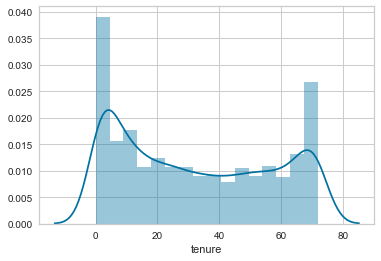

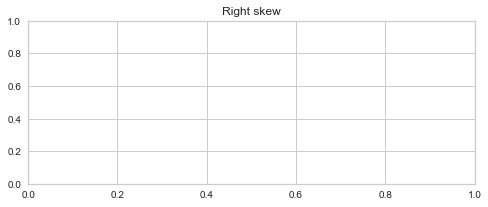

In [5]:
# 作圖發現有極端值
sns.distplot(df.tenure)#利用這條式子查看是否存在異常值，該值如果比0.8大就很值得懷疑數據經過不正確的填補
def check_bad_smell(df):
    error_event =abs((df.mode().iloc[0,] - df.median())/df.quantile(0.75) - df.quantile(0.25))
    problems = error_event[error_event>0.8]
    print(problems)
    return problems.index.tolist()
bad_smell = check_bad_smell(df)
plt.figure(figsize = (8,3))
plt.title('Right skew')
#sns.distplot(df.TotalCharges) 這裡我們發現有遺失值

缺失數據變為：
11
清除缺失值
count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


c:\python37\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,3
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,4
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1


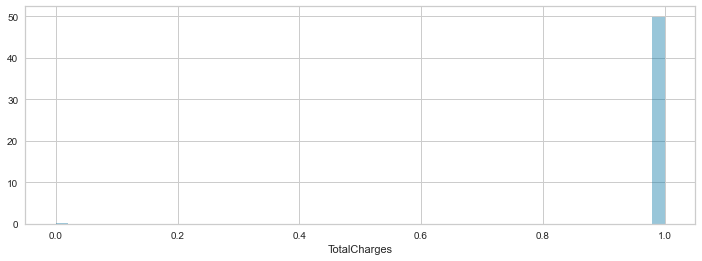

In [6]:
# 替代掉遺失值 當作null
df['TotalCharges'] = df.TotalCharges.replace(' ' , np.nan)#看看少了哪些
print('缺失數據變為：')
print(df.TotalCharges.isnull().sum())# 查看都是哪些類型的數據缺失
df[df.TotalCharges.isnull()]# 查看分佈
plt.figure(figsize = (12,4))
sns.distplot(df.TotalCharges.notnull().astype(float))#還蠻驚人的，這個分佈表示存在嚴重的極端值，那麼要做數據填補很困難，所以我們把那11筆數據刪除
print('清除缺失值')
df = df[df.TotalCharges.notnull()]
df = df.reset_index()[df.columns]#再轉換一次型態
df.TotalCharges = df.TotalCharges.astype(float)#查看原始數據，我們知道二分類的數據為Yes/No，我們想要把他們編碼，這樣方便之後的modeling
df = df.replace({'Yes':1 , 'No' :0})
df.head()
#發現還有一個叫做No phone service ，相當於No，所以這裡有記錄格式不統一的問題
df = df.replace({'No phone service':0})
df.head()
#連續型變量我們可以分箱，因為上面的探索我們發現有極端值，這樣的連續型的值是很危險的
print(df.tenure.describe())
#我們發現數據還蠻平衡的，所以採取等寬分箱（range相等）#撰寫一個將tenure轉變為離散變量的函數
def tenure_to_bins(series):
    labels = [1,2,3,4,5]
    bins = pd.cut(series , bins = 5 , labels = labels)
    return bins
temp_tenure = df.tenure
df['tenure_group'] = tenure_to_bins(temp_tenure)
df.head()

In [7]:
# 將兩類數據分開
churn = df[df.Churn == 1]
not_churn = df[df.Churn == 0]# 將類別變數與連續變數分開
Id_col = ['customerID']
target_col = ['Churn']
cat_cols = df.nunique()[df.nunique() < 6].keys().tolist() #取出Series.index，轉成一個list
cat_cols = [col for col in cat_cols if col not in target_col]
num_cols = [x for x in df.columns if x not in Id_col + target_col + cat_cols]

In [8]:
# 先導入相關套件
import plotly.offline as py
py.init_notebook_mode(connected=True) #為了能在本地端調用
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [9]:
lab = df.Churn.value_counts().keys().tolist()
values = df.Churn.value_counts().values.tolist()
trace = go.Pie(labels = lab , values = values , 
              marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer attrition in data",
                   plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",)
                  )
data = [trace]
fig = go.Figure(data=data , layout=layout)
py.iplot(fig)

In [10]:
#由於EDA會需要用到很多可視化分析，我們可以撰寫plotly的funciton來協助我們更快進行EDA，當然也可以將資料儲存為excel or csv檔，換到知名的數據可視化軟體tableau來做
#function  for pie plot for customer attrition types
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )
    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)
    
    
#繪製客戶流失的類型的直方圖(histgram)   
def plot_hist(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
    
#繪製連續型特徵的散佈圖矩陣，顯示每兩個特徵間的關係
def plot_scatter(df)  :
    
    df  = df.sort_values(by = "Churn" ,ascending = True)
    classes = df["Churn"].unique().tolist()
    classes
    
    class_code  = {classes[k] : k for k in range(2)}
    class_codecolor_vals = [class_code[cl] for cl in df["Churn"]]
    color_valspl_colorscale = "Portland"
    pl_colorscaletext = [df.loc[k,"Churn"] for k in range(len(df))]
    texttrace = go.Splom(dimensions = [dict(label  = "tenure",
                                       values = df["tenure"]),
                                  dict(label  = 'MonthlyCharges',
                                       values = df['MonthlyCharges']),
                                  dict(label  = 'TotalCharges',
                                       values = df['TotalCharges'])],
                     text = text,
                     marker = dict(color = color_vals,
                                   colorscale = pl_colorscale,
                                   size = 3,
                                   showscale = False,
                                   line = dict(width = .1,
                                               color='rgb(230,230,230)'
                                              )
                                  )
                    )
    axis = dict(showline  = True,
                zeroline  = False,
                gridcolor = "#fff",
                ticklen   = 4
               )
    
    layout = go.Layout(dict(title  = "Scatter plot matrix for Numerical columns for customer attrition",
                            autosize = False,
                            height = 800,
                            width  = 800,
                            dragmode = "select",
                            hovermode = "closest",
                            plot_bgcolor  = 'rgba(240,240,240, 0.95)',
                            xaxis1 = dict(axis),
                            yaxis1 = dict(axis),
                            xaxis2 = dict(axis),
                            yaxis2 = dict(axis),
                            xaxis3 = dict(axis),
                            yaxis3 = dict(axis),
                           )
                      )
    data   = [trace]
    fig = go.Figure(data = data,layout = layout )
    py.iplot(fig)# 將所有類別型特徵畫出來
for col in cat_cols:
    plot_pie(col)

In [11]:
for col in num_cols:
    plot_hist(col)

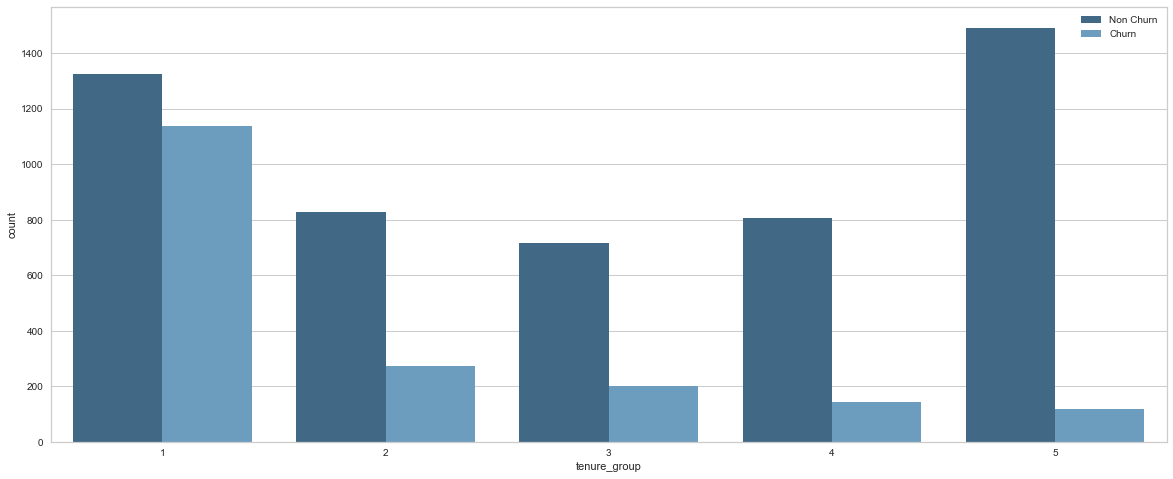

In [12]:
plt.figure(figsize = (20,8))
sns.countplot(x = df.tenure_group , hue = df.Churn,palette=("Blues_d"))
plt.legend(['Non Churn' , 'Churn'])

In [13]:
#二類別的特徵
bin_cols = df.nunique()[df.nunique()==2].keys().tolist()
#多類別的特徵
multi_cols = [col for col in cat_cols if col not in bin_cols]
multi_cols# 讀入需要的套件

# 類別編碼我們利用label encoding處理，由EDA知道資料不像常態，所以再對資料進行標準化
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
bin_cols = df.nunique()[df.nunique()==2].keys().tolist()
#多類別的特徵
multi_cols = [col for col in cat_cols if col not in bin_cols]#將二元數值編碼
# cato = df.tenure_group.cat.codes
# df.tenure_group = cat
le = LabelEncoder()
# df[multi_cols] = df[multi_cols].replace({0:'No' , 1:'Yes'})
for col in bin_cols:
    df[col] = le.fit_transform(df[col])#將多元編碼，因為沒有序列性，我們用one-hot encoding
df = pd.get_dummies(data = df , columns=multi_cols)
    
# 處理連續變量
std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)#因為fit_transform會得到一群序列，所以我們還要把他們弄成data frame# 將連續變量塞回df
df_origin =  df.copy()
df = df.drop(columns=num_cols , axis = 1)
df = df.merge(scaled , left_index=True , right_index=True , how = 'left')

In [14]:
#使用PCA縮減維度，並且劃出散佈圖
from sklearn.decomposition import  PCA
pca = PCA(n_components= 2)
X = df[[col for col in df.columns if col not in Id_col + target_col]]
Y = df[target_col + Id_col]#得到兩組PC，每個特徵對應權重
pc = pca.fit_transform(X)
pca_data  = pd.DataFrame(pc , columns=['PC1' , 'PC2'])
pca_data = pca_data.merge(Y , left_index = True , right_index = True , how = 'left')
pca_data = pca_data.replace({1:'Churn' , 0: 'Not Churn'})

def pca_scatter(target,color) :
    tracer = go.Scatter(x = pca_data[pca_data["Churn"] == target]["PC1"] ,
                        y = pca_data[pca_data["Churn"] == target]["PC2"],
                        name = target,mode = "markers",
                        marker = dict(color = color,
                                      line = dict(width = .5),
                                      symbol =  "diamond-open"),
                        text = ("Customer Id : " + 
                                pca_data[pca_data["Churn"] == target]['customerID'])
                       )
    return tracer
layout = go.Layout(dict(title = "Visualising data with principal components",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "principal component 1",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "principal component 2",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        height = 600
                       )
                  )
trace1 = pca_scatter("Churn",'red')
trace2 = pca_scatter("Not Churn",'royalblue')
data = [trace2,trace1]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [15]:
#二類別特徵我們做雷達圖
bi_cs = bin_cols
dat_rad = df[bin_cols]#畫出雷達圖
def plot_radar(df,aggregate,title) :
    data_frame = df[df["Churn"] == aggregate] 
    data_frame_x = data_frame[bi_cs].sum().reset_index()
    data_frame_x.columns  = ["feature","yes"]
    data_frame_x["no"]    = data_frame.shape[0]  - data_frame_x["yes"]
    data_frame_x  = data_frame_x[data_frame_x["feature"] != "Churn"]
    
    #count of 1's(yes)
    trace1 = go.Scatterpolar(r = data_frame_x["yes"].values.tolist(),
                             theta = data_frame_x["feature"].tolist(),
                             fill  = "toself",name = "count of 1's",
                             mode = "markers+lines",
                             marker = dict(size = 5)
                            )
    #count of 0's(No)
    trace2 = go.Scatterpolar(r = data_frame_x["no"].values.tolist(),
                             theta = data_frame_x["feature"].tolist(),
                             fill  = "toself",name = "count of 0's",
                             mode = "markers+lines",
                             marker = dict(size = 5)
                            ) 
    layout = go.Layout(dict(polar = dict(radialaxis = dict(visible = True,
                                                           side = "counterclockwise",
                                                           showline = True,
                                                           linewidth = 2,
                                                           tickwidth = 2,
                                                           gridcolor = "white",
                                                           gridwidth = 2),
                                         angularaxis = dict(tickfont = dict(size = 10),
                                                            layer = "below traces"
                                                           ),
                                         bgcolor  = "rgb(243,243,243)",
                                        ),
                            paper_bgcolor = "rgb(243,243,243)",
                            title = title,height = 700))
    
    data = [trace2,trace1]
    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig)#plot
plot_radar(dat_rad,1,"Churn -  Customers")
plot_radar(dat_rad,0,"Non Churn - Customers")

c:\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\python37\lib\site-packages\plotly\tools.py:464: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



LogisticRegression(multi_class='ovr', n_jobs=1, random_state=123,
                   solver='liblinear')

 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407

Accuracy   Score :  0.7874911158493249
Area under curve :  0.688965993860362 



c:\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed 

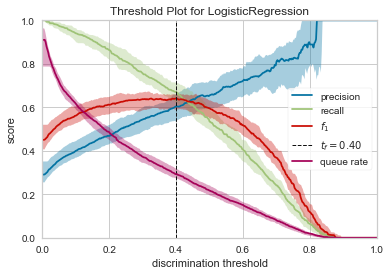

In [16]:
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
from sklearn.metrics import  roc_auc_score , roc_curve 
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import  precision_score ,recall_score
from yellowbrick.classifier import DiscriminationThreshold

#  df, Id_col, and target_col 已定義好
# 拆分數據集
train, test = train_test_split(df, test_size=0.2, random_state=42)
cols = [col for col in df.columns if col not in Id_col + target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X = test[cols]
test_Y = test[target_col]

# 初始化 coef_sumry
coef_sumry = pd.DataFrame()

# 用不同演算法測試
def select_model_prediction(algorithm, training_x, testing_x, training_y, testing_y, cols, cf, threshold_plot):
    # Fit the model
    algorithm.fit(training_x, training_y)
    predictions = algorithm.predict(testing_x)

    # 預測每一個值分到0/1的機率
    probabilities = algorithm.predict_proba(testing_x)

    

    # 係數與特徵重要性
    if cf == "coefficients":
        coefficients = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features":
        coefficients = pd.DataFrame(algorithm.feature_importances_)

    if not coefficients.empty:
        column_df = pd.DataFrame(cols)
        coef_sumry = pd.merge(coefficients, column_df, left_index=True, right_index=True, how="left")
        coef_sumry.columns = ["coefficients", "features"]
        coef_sumry = coef_sumry.sort_values(by="coefficients", ascending=False)

    print(algorithm)
    print("\n Classification report : \n", classification_report(testing_y, predictions))
    print("Accuracy   Score : ", accuracy_score(testing_y, predictions))

    # Confusion matrix
    conf_matrix = confusion_matrix(testing_y, predictions)

    # ROC AUC score
    model_roc_auc = roc_auc_score(testing_y, predictions)
    print("Area under curve : ", model_roc_auc, "\n")
    fpr, tpr, thresholds = roc_curve(testing_y, probabilities[:, 1])

    # Plot confusion matrix
    trace1 = go.Heatmap(z=conf_matrix, x=["Not churn", "Churn"], y=["Not churn", "Churn"],
                        showscale=False, colorscale="Picnic", name="matrix")

    # Plot ROC curve
    trace2 = go.Scatter(x=fpr, y=tpr, name="Roc : " + str(model_roc_auc),
                        line=dict(color=('rgb(22, 96, 167)'), width=2))
    trace3 = go.Scatter(x=[0, 1], y=[0, 1], line=dict(color=('rgb(205, 12, 24)'), width=2, dash='dot'))

    # Plot coefficients
    if not coef_sumry.empty:
        trace4 = go.Bar(x=coef_sumry["features"], y=coef_sumry["coefficients"], name="coefficients",
                        marker=dict(color=coef_sumry["coefficients"], colorscale="Picnic",
                                    line=dict(width=.6, color="black")))
    else:
        trace4 = go.Bar(x=[], y=[])

    # Subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix', 'Receiver operating characteristic', 'Feature Importances'))

    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 2)
    fig.append_trace(trace3, 1, 2)
    fig.append_trace(trace4, 2, 1)

    fig['layout'].update(showlegend=False, title="Model performance", autosize=False, height=900, width=800,
                         plot_bgcolor='rgba(240,240,240, 0.95)', paper_bgcolor='rgba(240,240,240, 0.95)',
                         margin=dict(b=195))
    fig["layout"]["xaxis2"].update(dict(title="false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title="true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid=True, tickfont=dict(size=10), tickangle=90))
    py.iplot(fig)

    # Yellowbrick visualizer
    if threshold_plot:
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x, training_y)
        visualizer.poof()

# Logistic Regression model
logit = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1,
                           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2', random_state=123,
                           solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# Run the model
select_model_prediction(logit, train_X, test_X, train_Y, test_Y, cols, "coefficients", threshold_plot=True)

LogisticRegression(class_weight={0: 1, 1: 2}, multi_class='ovr', n_jobs=1,
                   solver='liblinear')

 Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.77      0.82      1033
           1       0.53      0.72      0.61       374

    accuracy                           0.76      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.79      0.76      0.77      1407

Accuracy   Score :  0.7562189054726368
Area under curve :  0.7461329599163435 



c:\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\python37\lib\site-packages\plotly\tools.py:464: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



c:\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed 

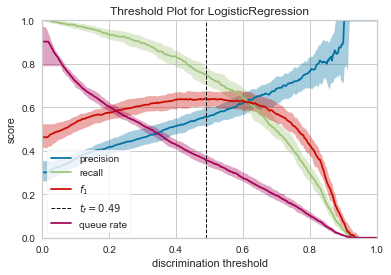

In [20]:
#這裡我們調整模型的權重，有EDA知道是73:27，那把權重改為1:2，重新Fit

# Logistic Regression model
logit2 = LogisticRegression(C=1.0, class_weight = {0:1 , 1:2}, dual=False, fit_intercept=True, intercept_scaling=1,
                           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                           solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# Run the model
select_model_prediction(logit2, train_X, test_X, train_Y, test_Y, cols, "coefficients", threshold_plot=True)

#y_pred = logit2.predict(test_X)
#cm = confusion_matrix(test_Y,y_pred)
#print(cm)
#print(classification_report(test_Y,y_pred))